# SG-MCMC Sampling - Hands-on
This notebook implements sgmcmc samplers to test them on simple landscapes. So we are able to get a feeling for their differences and behavior.

In [30]:
import jax.numpy as jnp
import os
import matplotlib.pyplot as plt

from enhancing_sgmcmc.samplers.sghmc import SGHMC
from enhancing_sgmcmc.utils import (
    gaussian_mixture_logprob,
    generate_gmm_data,
    gmm_grad_estimator,
    run_sequential_sghmc,
    plot_gmm_sampling,
    compute_fisher_diagonal,
)
from enhancing_sgmcmc.metrics import compute_metrics

In [2]:
os.chdir("..")

In [3]:
%load_ext autoreload
%autoreload 2

### Setup

In [4]:
seed = 1

In [20]:
means = jnp.array([[0, 0]])
covs = jnp.array([[[5, 0], [0, 0.2]]])
weights = jnp.array([1])
data_samples = 1000

In [21]:
sampler = SGHMC(gmm_grad_estimator)
init_position = jnp.array([0.0, 0.0])

samples = generate_gmm_data(
    seed=seed, means=means, covs=covs, weights=weights, n_samples=data_samples
)

In [27]:
prec_identity = jnp.array([1, 1])
prec_fisher = compute_fisher_diagonal(
    position=init_position,
    data=samples,
)
step_size = 0.05
mdecay = 0.02
burnin = 0
n_batches = 5
mcmc_samples = 500

In [68]:
trajectory = run_sequential_sghmc(
    sampler=sampler,
    data=samples,
    init_position=init_position,
    init_m=prec_fisher,
    batch_size=len(samples) // n_batches,
    mcmc_samples=mcmc_samples,
    step_size=step_size,
    mdecay=mdecay,
    seed=seed,
)

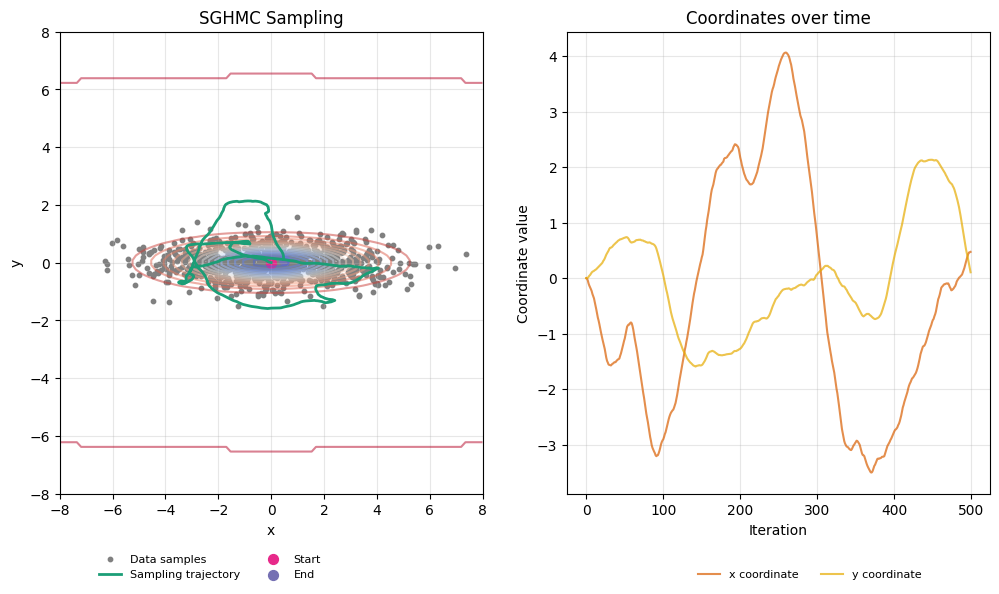

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot_gmm_sampling(
    fig=fig,
    ax=ax,
    trajectory=trajectory,
    samples=samples,
    means=means,
    covs=covs,
    weights=weights,
    title="SGHMC Sampling",
    burnin=burnin,
    plot_type="both",
    xlim=(-8, 8),
    ylim=(-8, 8),
)

In [73]:
compute_metrics(
    samples=trajectory,
    true_samples=samples,
    means=means,
    covs=covs,
    weights=weights,
    metrics=["nll", "ksd", "ess", "wasserstein"],
)

{'wasserstein': 1.224842981173424e-05,
 'nll': 4.923323154449463,
 'ksd': 2.9252710342407227,
 'min_ess': 5.610395431518555,
 'mean_ess': 5.873957633972168,
 'max_ess': 6.137519359588623,
 'ess_ratio': 0.9141144752502441,
 'max_iact': 89.12027740478516,
 'mean_iact': 85.293212890625}

In [ ]:
# fig.savefig("gmm_sghmc.png", dpi=300, bbox_inches="tight")